<a href="https://colab.research.google.com/github/benammarfares/Vrp/blob/main/Vrp_Simulated_Annealing_for_VRP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import sys # Pour sys.float_info.max
import csv # Pour la lecture/écriture CSV
import os # Pour vérifier si un fichier existe

def generate_multidepot_vrp_csv(
    filename="multidepot_vrp_data.csv",
    num_depots=2,
    num_clients=30,
    depot_x_range=(0, 100),
    depot_y_range=(0, 100),
    client_x_range=(0, 100),
    client_y_range=(0, 100),
    vehicle_capacity=150, # Capacité de *chaque* véhicule
    depot_num_vehicles_range=(1, 5), # Nombre de véhicules disponibles PAR dépôt
    client_demand_range=(10, 40)
):
    """
    Génère un fichier CSV d'exemple pour un problème VRP capacitaire multi-dépôts.

    Args:
        filename (str): Le nom du fichier CSV à générer.
        num_depots (int): Le nombre de dépôts à générer.
        num_clients (int): Le nombre de clients à générer.
        depot_x_range (tuple): (min_x, max_x) plage de coordonnées x pour les dépôts.
        depot_y_range (tuple): (min_y, max_y) plage de coordonnées y pour les dépôts.
        client_x_range (tuple): (min_x, max_x) plage de coordonnées x pour les clients.
        client_y_range (tuple): (min_y, max_y) plage de coordonnées y pour les clients.
        vehicle_capacity (float): La capacité de chaque véhicule (uniforme pour tous).
        depot_num_vehicles_range (tuple): (min_vehicles, max_vehicles) plage
                                           pour le nombre de véhicules disponibles par dépôt.
        client_demand_range (tuple): (min_demand, max_demand) plage de demande
                                     (en colis) pour les clients.
    """
    print(f"Génération des données VRP multi-dépôts dans: '{filename}'")

    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        # En-tête du fichier CSV
        # 'Capacity' ici représente la capacité des véhicules (spécifique aux lignes 'Depot')
        # 'Demand' représente la demande du point (spécifique aux lignes 'Client')
        # 'NumVehicles' représente le nombre de véhicules à ce dépôt (spécifique aux lignes 'Depot')
        writer.writerow(['Type', 'ID', 'X', 'Y', 'Capacity', 'Demand', 'NumVehicles'])

        # Générer les dépôts
        for i in range(num_depots):
            depot_id = i + 1 # IDs des dépôts commencent à 1
            x = random.uniform(depot_x_range[0], depot_x_range[1])
            y = random.uniform(depot_y_range[0], depot_y_range[1])
            num_vehicles = random.randint(depot_num_vehicles_range[0], depot_num_vehicles_range[1])

            # Écrire la ligne du dépôt
            # Pour un dépôt, la demande est 0
            writer.writerow(['Depot', depot_id, x, y, vehicle_capacity, 0, num_vehicles])

        # Générer les clients
        # Les IDs des clients commencent après les IDs des dépôts pour éviter les conflits
        client_id_start = num_depots + 1
        for i in range(num_clients):
            client_id = client_id_start + i
            x = random.uniform(client_x_range[0], client_x_range[1])
            y = random.uniform(client_y_range[0], client_y_range[1])
            demand = random.randint(client_demand_range[0], client_demand_range[1])

            # Écrire la ligne du client
            # Pour un client, la capacité et le nombre de véhicules sont nuls ou non pertinents
            writer.writerow(['Client', client_id, x, y, '', demand, '']) # Laissez les colonnes non pertinentes vides

    print(f"Fichier '{filename}' généré avec {num_depots} dépôts et {num_clients} clients.")

# --- Exemple d'utilisation ---

if __name__ == "__main__":
    # Définir les paramètres pour la génération de données
    gen_params = {
        'filename': "my_vrp_dataset.csv",
        'num_depots': 3,
        'num_clients': 50,
        'depot_x_range': (0, 50), # Dépôts plutôt regroupés
        'depot_y_range': (0, 50),
        'client_x_range': (0, 100), # Clients sur une zone plus large
        'client_y_range': (0, 100),
        'vehicle_capacity': 200.0, # Tous les véhicules ont une capacité de 200 colis
        'depot_num_vehicles_range': (2, 6), # Chaque dépôt aura entre 2 et 6 véhicules
        'client_demand_range': (10, 50) # Demande entre 10 et 50 colis par client
    }

    # Appeler la fonction pour générer et sauvegarder le fichier
    generate_multidepot_vrp_csv(**gen_params)

    # Vous pouvez maintenant vérifier le fichier "my_vrp_dataset.csv"
    # dans le répertoire d'exécution (ou dans l'onglet Fichiers de Google Colab).
    # Son contenu ressemblera à ceci (les valeurs exactes seront aléatoires):
    # Type,ID,X,Y,Capacity,Demand,NumVehicles
    # Depot,1,25.12,30.56,200.0,0,4
    # Depot,2,45.78,10.91,200.0,0,3
    # Depot,3,10.05,48.22,200.0,0,5
    # Client,4,78.43,90.11,,35,
    # Client,5,12.34,5.67,,15,
    # ...etc pour les 50 clients

Génération des données VRP multi-dépôts dans: 'my_vrp_dataset.csv'
Fichier 'my_vrp_dataset.csv' généré avec 3 dépôts et 50 clients.


Generating initial solution with Nearest Neighbor...
Starting Simulated Annealing with Initial Cost: 1442.05
Iteration 0/10000: Current Cost = 1486.85, Best Cost = 1442.05, Temperature = 995.000000
Iteration 1000/10000: Current Cost = 1798.70, Best Cost = 1442.05, Temperature = 6.620699
Iteration 2000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0.044054
Iteration 3000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0.000293
Iteration 4000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0.000002
Iteration 5000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0.000000
Iteration 6000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0.000000
Iteration 7000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0.000000
Iteration 8000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0.000000
Iteration 9000/10000: Current Cost = 1671.70, Best Cost = 1442.05, Temperature = 0

<ipython-input-7-ceb13b213210>:248: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(routes) if routes else 1) # Get distinct colors for routes, handle case with no routes


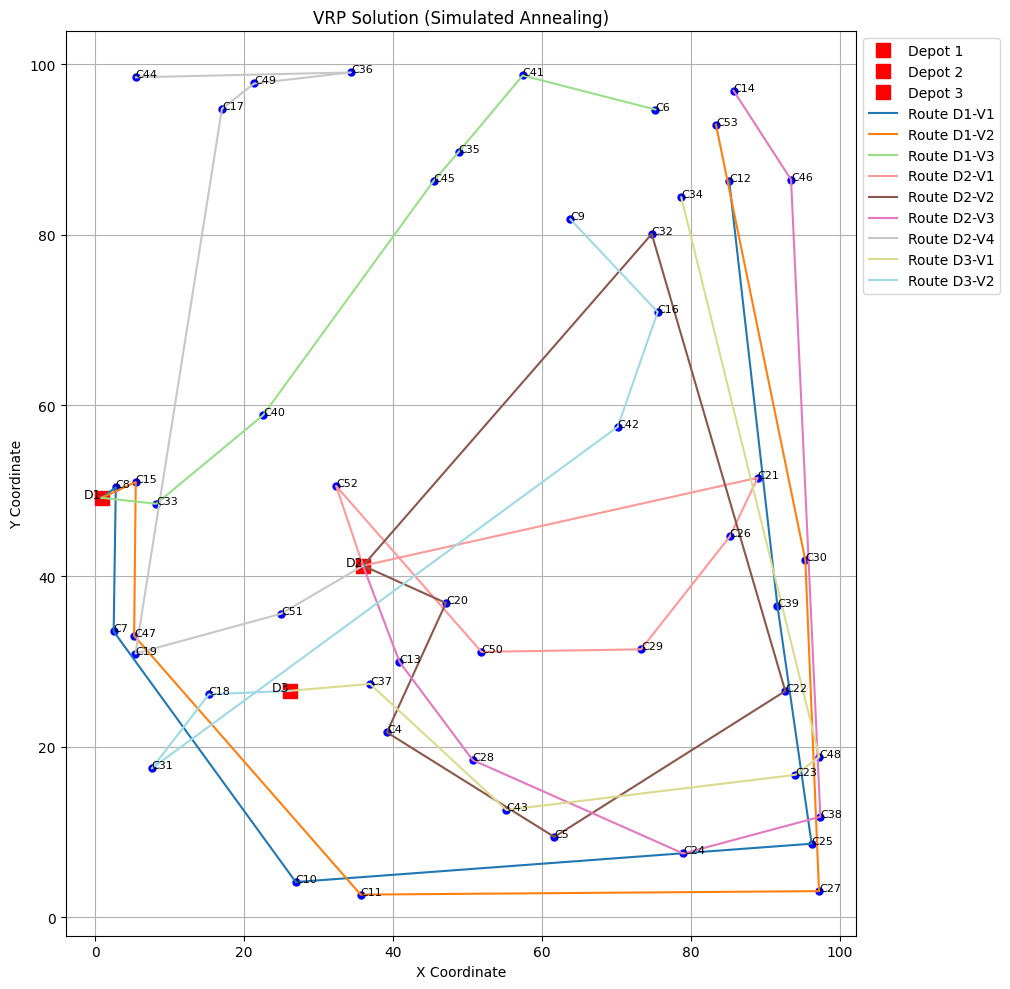

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import csv # Assuming you still need this for data generation if you regenerate

# (Optional) Your data generation code for generate_multidepot_vrp_csv
# ... (paste your generate_multidepot_vrp_csv function here if you need to regenerate the data)

# Define the euclidean_distance function (used in both algorithms)
def euclidean_distance(p1, p2):
    """Calculates the Euclidean distance between two points."""
    return math.sqrt((p1['X'] - p2['X'])**2 + (p1['Y'] - p2['Y'])**2)

# --- Code for the Nearest Neighbor VRP Solution ---
# (Paste the entire solve_vrp_nearest_neighbor function here)
def solve_vrp_nearest_neighbor(file_path):
    """
    Solves the VRP using a simple Nearest Neighbor heuristic
    considering multiple depots and capacity constraints.
    """
    df = pd.read_csv(file_path)
    depots = df[df['Type'] == 'Depot'].to_dict('records')
    clients = df[df['Type'] == 'Client'].to_dict('records')

    unvisited_clients = set(client['ID'] for client in clients)
    routes = {} # Dictionary to store routes per depot and vehicle

    # Initialize vehicles per depot
    depot_vehicles = {}
    for depot in depots:
        depot_vehicles[depot['ID']] = []
        for i in range(int(depot['NumVehicles'])):
            depot_vehicles[depot['ID']].append({
                'id': f"{depot['ID']}-{i+1}",
                'capacity': depot['Capacity'],
                'current_load': 0,
                'route': [depot['ID']], # Start route at depot
                'current_location': depot
            })
            routes[(depot['ID'], i+1)] = [] # Initialize route in the routes dictionary


    # Simple strategy: iterate through depots and their vehicles
    while unvisited_clients:
        for depot in depots:
            for vehicle in depot_vehicles[depot['ID']]:
                if not unvisited_clients:
                    break # All clients visited

                current_location = vehicle['current_location']
                nearest_client = None
                min_distance = float('inf')

                # Find the nearest unvisited client
                for client in clients:
                    if client['ID'] in unvisited_clients:
                        dist = euclidean_distance(current_location, client)
                        if dist < min_distance:
                            min_distance = dist
                            nearest_client = client

                if nearest_client and vehicle['current_load'] + nearest_client['Demand'] <= vehicle['capacity']:
                    # Add client to route
                    vehicle['route'].append(nearest_client['ID'])
                    vehicle['current_load'] += nearest_client['Demand']
                    vehicle['current_location'] = nearest_client
                    unvisited_clients.remove(nearest_client['ID'])
                    # print(f"Vehicle {vehicle['id']} visiting client {nearest_client['ID']}") # Optional print statement
                else:
                    # Vehicle returns to depot (or moves to next depot if applicable - more complex logic needed for true multi-depot)
                    # For simplicity in this example, just consider it returns to its origin depot
                    if vehicle['route'][-1] != depot['ID']: # Avoid adding depot twice if already there
                         vehicle['route'].append(depot['ID'])
                    vehicle['current_location'] = depot
                    vehicle['current_load'] = 0 # Assuming load is dropped at depot
                    # print(f"Vehicle {vehicle['id']} returning to depot {depot['ID']}") # Optional print statement

        # Optional: Implement a condition to break if no clients can be visited by any vehicle
        # (e.g., due to insufficient capacity or all remaining clients are too far)
        # This basic loop might run indefinitely if clients are unreachable.


    # Store the final routes
    final_routes = {}
    for depot in depots:
        for i, vehicle in enumerate(depot_vehicles[depot['ID']]):
             final_routes[(depot['ID'], i+1)] = vehicle['route']


    return depots, clients, final_routes


# --- Code for the Simulated Annealing VRP Solution ---
# (Paste the rest of your Simulated Annealing code here, including calculate_total_cost, generate_neighbor, simulated_annealing_vrp, and visualize_vrp_solution)

def calculate_total_cost(routes, depots, clients):
    """
    Calculates the total cost (e.g., total distance) of a given set of routes.
    You'll need to map node IDs in the routes to their coordinates.
    """
    total_distance = 0
    node_coords = {d['ID']: d for d in depots}
    node_coords.update({c['ID']: c for c in clients})

    for (depot_id, vehicle_id), route in routes.items():
        if len(route) > 1:
            for i in range(len(route) - 1):
                try:
                    p1 = node_coords[route[i]]
                    p2 = node_coords[route[i+1]]
                    total_distance += euclidean_distance(p1, p2)
                except KeyError:
                    # This should not happen if route generation and neighbor operations
                    # maintain valid node IDs.
                    print(f"Warning: Node ID {route[i]} or {route[i+1]} not found in calculate_total_cost.")
                    pass # Or handle appropriately


    return total_distance

def generate_neighbor(current_routes, depots, clients):
    """
    Generates a neighboring solution by applying a neighborhood operation (simple swap).
    Needs more sophisticated VRP neighborhood operations and feasibility checks.
    """
    neighbor_routes = {k: list(v) for k, v in current_routes.items()} # Create a copy

    # Simple example: try to swap two clients in a random route
    if neighbor_routes:
        # Select a random route that has at least two client nodes
        eligible_routes = [(k, v) for k, v in neighbor_routes.items() if len([node for node in v if node > len(depots)]) >= 2]

        if eligible_routes:
            (depot_id, vehicle_id), route = random.choice(eligible_routes)
            client_indices = [i for i, node_id in enumerate(route) if node_id > len(depots)] # Find indices of clients

            if len(client_indices) >= 2:
                # Select two random indices from the client_indices list
                swap_indices_in_client_list = random.sample(range(len(client_indices)), 2)
                idx1_in_client_list = swap_indices_in_client_list[0]
                idx2_in_client_list = swap_indices_in_client_list[1]

                # Get the actual indices in the route list where the clients are located
                actual_route_index1 = client_indices[idx1_in_client_list]
                actual_route_index2 = client_indices[idx2_in_client_list]

                # Perform the swap using the actual indices in the route list
                neighbor_routes[(depot_id, vehicle_id)][actual_route_index1], neighbor_routes[(depot_id, vehicle_id)][actual_route_index2] = \
                    neighbor_routes[(depot_id, vehicle_id)][actual_route_index2], neighbor_routes[(depot_id, vehicle_id)][actual_route_index1]

    # Important: In a real implementation, you would check feasibility here.
    # For this simplified example, we assume moves are implicitly feasible
    # for the purpose of demonstrating the SA structure.

    return neighbor_routes


def simulated_annealing_vrp(file_path, initial_temperature, cooling_rate, num_iterations):
    """
    Solves the VRP using Simulated Annealing.
    """
    df = pd.read_csv(file_path)
    depots = df[df['Type'] == 'Depot'].to_dict('records')
    clients = df[df['Type'] == 'Client'].to_dict('records')

    # 1. Generate initial solution
    print("Generating initial solution with Nearest Neighbor...")
    try:
        _, _, current_routes = solve_vrp_nearest_neighbor(file_path)
    except NameError:
        print("Error: solve_vrp_nearest_neighbor function is not defined.")
        return None, None, None # Return None if initial solution generation fails


    current_cost = calculate_total_cost(current_routes, depots, clients)
    best_routes = {k: list(v) for k, v in current_routes.items()}
    best_cost = current_cost

    temperature = initial_temperature

    print(f"Starting Simulated Annealing with Initial Cost: {current_cost:.2f}")

    # 5. Iteration
    for i in range(num_iterations):
        # 2. Generate neighbor
        neighbor_routes = generate_neighbor(current_routes, depots, clients)

        # Calculate neighbor cost
        neighbor_cost = calculate_total_cost(neighbor_routes, depots, clients)

        delta_cost = neighbor_cost - current_cost

        # 4. Acceptance Probability
        if delta_cost < 0:
            # Accept better solution
            current_routes = {k: list(v) for k, v in neighbor_routes.items()}
            current_cost = neighbor_cost
            if current_cost < best_cost:
                best_cost = current_cost
                best_routes = {k: list(v) for k, v in current_routes.items()}
        else:
            # Accept worse solution with probability
            # Avoid math.exp(large positive number) issues by capping delta_cost if needed,
            # but for typical distance costs, this should be fine.
            try:
                acceptance_probability = math.exp(-delta_cost / temperature)
            except OverflowError:
                 acceptance_probability = 0.0 # Treat large delta_cost as zero probability

            if random.random() < acceptance_probability:
                current_routes = {k: list(v) for k, v in neighbor_routes.items()}
                current_cost = neighbor_cost

        # 3. Cooling Schedule
        temperature *= cooling_rate

        if i % (num_iterations // 10) == 0 or i == num_iterations -1: # Print progress at intervals
            print(f"Iteration {i}/{num_iterations}: Current Cost = {current_cost:.2f}, Best Cost = {best_cost:.2f}, Temperature = {temperature:.6f}")


    print("\nSimulated Annealing finished.")
    print(f"Best found cost: {best_cost:.2f}")
    return depots, clients, best_routes

def visualize_vrp_solution(depots, clients, routes):
    """Visualizes the VRP solution."""
    if routes is None:
        print("No solution to visualize.")
        return

    plt.figure(figsize=(12, 10))

    # Plot depots
    for depot in depots:
        plt.plot(depot['X'], depot['Y'], 's', markersize=10, color='red', label=f"Depot {depot['ID']}")
        plt.text(depot['X'], depot['Y'], f"D{depot['ID']}", fontsize=9, ha='right')


    # Plot clients
    for client in clients:
        plt.plot(client['X'], client['Y'], 'o', markersize=5, color='blue')
        plt.text(client['X'], client['Y'], f"C{client['ID']}", fontsize=8, ha='left')

    # Plot routes
    colors = plt.cm.get_cmap('tab20', len(routes) if routes else 1) # Get distinct colors for routes, handle case with no routes
    route_index = 0
    if routes:
        for (depot_id, vehicle_id), route in routes.items():
            if len(route) > 1: # Only plot if the route has more than just the depot
                x_coords = []
                y_coords = []
                for node_id in route:
                    # Find the node (depot or client) based on ID
                    node = None
                    for d in depots:
                        if d['ID'] == node_id:
                            node = d
                            break
                    if node is None:
                         for c in clients:
                             if c['ID'] == node_id:
                                 node = c
                                 break

                    if node:
                        x_coords.append(node['X'])
                        y_coords.append(node['Y'])
                    else:
                         print(f"Warning: Node ID {node_id} not found for plotting.")


                if x_coords: # Plot only if there are coordinates
                    plt.plot(x_coords, y_coords, linestyle='-', color=colors(route_index), label=f"Route D{depot_id}-V{vehicle_id}")
                    # Add arrows to indicate direction (optional, can make plot cluttered for many routes)
                    # for i in range(len(x_coords) - 1):
                    #     plt.arrow(x_coords[i], y_coords[i], x_coords[i+1] - x_coords[i], y_coords[i+1] - y_coords[i],
                    #               head_width=1.5, head_length=1.5, fc=colors(route_index), ec=colors(route_index), length_includes_head=True)


                route_index += 1


    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("VRP Solution (Simulated Annealing)")
    # Adjust legend to avoid overlapping labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
    plt.show()


# --- Example Usage ---
if __name__ == "__main__":
    # Assuming the CSV file from your previous code is generated and named 'my_vrp_dataset.csv'

    initial_temp = 1000.0
    cooling_rate = 0.995 # Slightly slower cooling rate might explore more
    num_iterations = 10000 # Increase iterations for better exploration

    depots, clients, final_solution_routes = simulated_annealing_vrp(
        'my_vrp_dataset.csv', initial_temp, cooling_rate, num_iterations
    )

    visualize_vrp_solution(depots, clients, final_solution_routes)